# DALL・E

DALL・EをOpenAIのAPI経由で使うコードです．画像のマスクされている箇所をテキストで指示した内容をもとに作成します．

In [4]:
import openai
import requests
from PIL import Image, ImageDraw
from io import BytesIO
import IPython.display as display

### 画像をマスクする

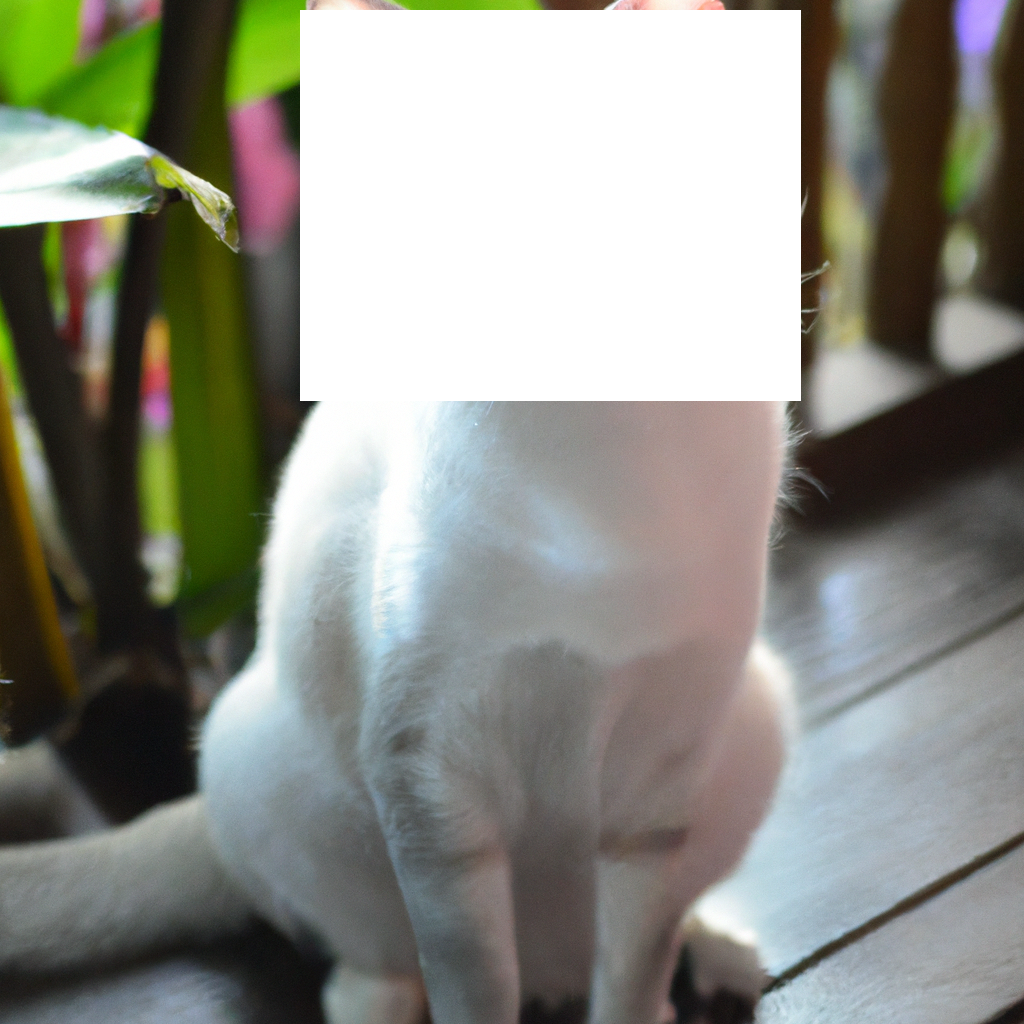

In [38]:
image = Image.open('sample_image.png')
image = image.convert("RGBA")

# 画像の一部を透明にするための描画オブジェクトを作成します
draw = ImageDraw.Draw(image)

# 透明にする矩形領域を指定します (left, top, right, bottom)
rect = (300, 10, 800, 400)

# 透明な四角形を描きます
draw.rectangle(rect, fill=(255, 255, 255, 0))  # 最後の0は透明度を示す


image.save('mask.png', "PNG")
display(image.convert("RGB"))


### 画像編集
* アップロードする画像とマスクは、どちらもサイズが4MB以下の正方形のPNG画像，かつ互いに同じ寸法の画像である必要があります．

In [45]:
response = openai.Image.create_edit(
  image=open("sample_image.png", "rb"),
  mask=open("mask.png", "rb"),
  prompt="Cat with black head and blue eyes.",
  n=1,
  size="1024x1024"
)
image_url = response['data'][0]['url']

In [46]:
response = requests.get(image_url)
response.raise_for_status()

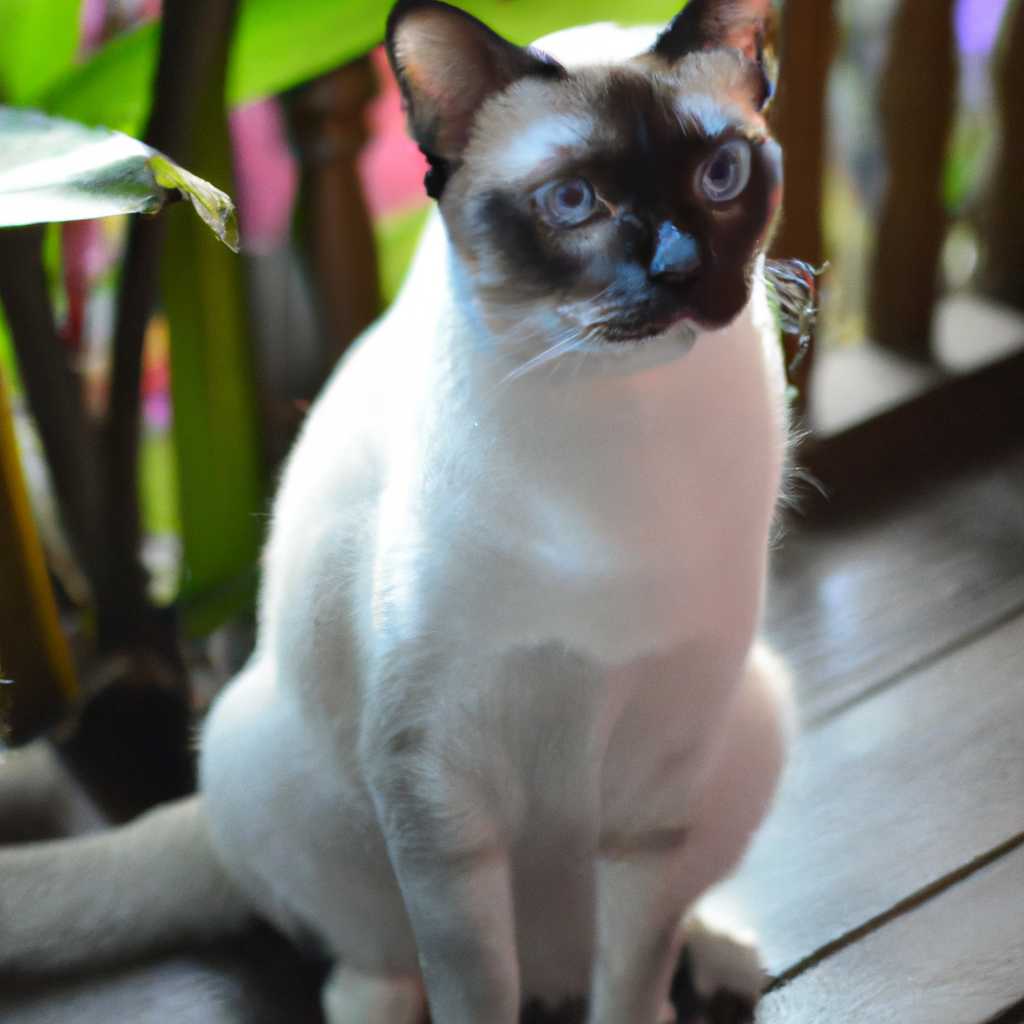

In [47]:
image_data = BytesIO(response.content)
image = Image.open(image_data)
display(image)

### 画像を保存する

In [48]:
with open('sample_image2.png', 'wb') as file:
    file.write(response.content)